# Quadractic times sin

Test how gradient descent diverges and converges on non-convex landscape.

Landscape is given by
$$
f(x) = x^2 (1 + \delta \cos(2\pi x/\lambda)). 
$$
gradient is
$$
f'(x) = 2x(1 + \delta \cos(2\pi x/\lambda)) - 2\pi\delta x^2 \sin(2\pi x/\lambda) /\lambda 
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

visualize the function

In [2]:
def lossf(x,delta,wl):
    return x**2 * (1 + delta * np.cos(2*np.pi*x / wl))

In [3]:
x = np.linspace(-2,2,100)
y = lossf(x, 0.2, 0.1)

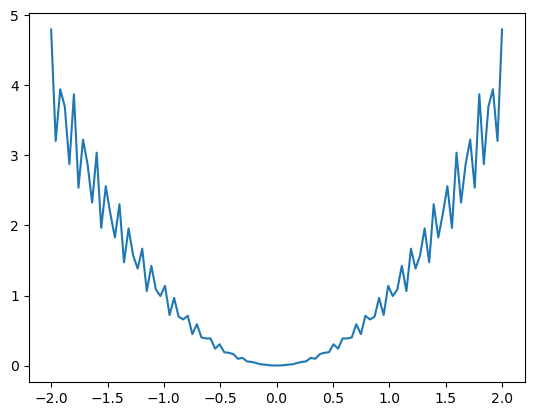

In [4]:
plt.plot(x,y)

Fisrt test divergence and convergence over standard quadratic functions

In [5]:
def gradf(x,delta,wl):
    return 2*x*(1 + delta * np.cos(2*np.pi*x / wl)) - 2*np.pi*x**2 * delta * np.sin(2*np.pi*x / wl) / wl

In [6]:
def GD(x0, lr, steps, delta, wl):
    x_traj = np.zeros(steps+1)
    x_traj[0] = x0
    loss_traj = np.zeros(steps+1)
    loss_traj[0] = lossf(x0,delta,wl)
    for i in range(steps):
        x_traj[i+1] = x0 - lr * gradf(x0,delta,wl)
        x0 = x_traj[i+1]
        loss_traj[i+1] = lossf(x0,delta,wl)
        if loss_traj[i+1] > 1e+10:
            break
    return loss_traj, x_traj

In [14]:
loss_traj, _ = GD(1.0, 0.2, 1000, .2, .1)

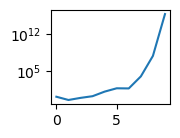

In [18]:
plt.figure(figsize=(3.375/2, 3.375/8*3), constrained_layout=True)
#plt.plot(range(1000+1), loss_traj)
#plt.savefig('./figures/boundtrain.pdf') # 0.01
plt.plot(range(10), loss_traj[:10])
plt.yscale('log')
plt.savefig('./figures/divergetrain.pdf') # 0.2

Do a detailed scan!!!